<h2> Проект "Анализ рынка компьютерных игр" <a class="tocSkip"></h2>

**Цель проекта:** выявление определяющих успешность комрьютерных игры закономерностей, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламную кампанию интернет-магазина «Стримчик» на 2017 год. \
Для достижения указанной цели используем исторические данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах.
    
**План работы** \
*Шаг 1.* Загрузка исследуемых данных и изучение общей информации о них. \
*Шаг 2.* Предобработка данных. \
2.1. Изучение и корректировка (при необходимости) названий столбцов. \
2.2. Изучение и преобразование (при необходимости) типов данных. \
2.3. Обработка пропусков в данных (при необходимости, по возможности). \
2.4. Обработка дубликатов  в данных (при необходимости, по возможности). \
2.5. Рассчет суммарных продаж игр во всех регионах. \
*Шаг 3.* Исследовательский анализ данных. \
3.1. Изучение количества выпускаемых игр в разные годы. \
3.2. Изучение объемов продаж игр на каждой платформе. \
3.3. Определение лидирующих по продажам платформ и потенциально прибыльных платформ. \
3.4. Изучение размаха глобальных продаж каждой платформы (построение графика «ящик с усами»). \
3.5. Изучение влияния отзывов пользователей и критиков на продажи конкретной потенциально перспективной платформы. \
3.6. Изучение влияния отзывов пользователей и критиков на продажи иных потенциально перспективных платформ. \
3.7. Изучение общего распределения игр по жанрам. \
*Шаг 4.* Составление портретов пользователей каждого региона. \
4.1. Определение самых популярных платформ (топ-5) для пользователя каждого региона (NA, EU, JP). \
4.2. Определение самых популярных жанров (топ-5) для пользователя каждого региона (NA, EU, JP). \
4.3. Определение влияния рейтинга ESRB на продажи в каждом отдельном регионе (NA, EU, JP). \
*Шаг 5.* Проверка гипотез. \
5.1. Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". \
5.2. Проверка гипотезы "Средние пользовательские рейтинги жанров action и sports разные". \
*Шаг 6.* Формулирование общего вывода по результатам проделанного анализа.

**Описание исследуемых данных:** \
К анализу представлены данные о продажах компьютерных игр, оценках пользователей и экспертов, жанрах и платформах за период 1980-2016 гг. \
*Датафрейм предусматривает следующие столбцы:* \
Name — название игры. \
Platform — платформа. \
Year_of_Release — год выпуска. \
Genre — жанр игры. \
NA_sales — продажи в Северной Америке (миллионы проданных копий). \
EU_sales — продажи в Европе (миллионы проданных копий). \
JP_sales — продажи в Японии (миллионы проданных копий). \
Other_sales — продажи в других странах (миллионы проданных копий). \
Critic_Score — оценка критиков (максимум 100). \
User_Score — оценка пользователей (максимум 10). \
Rating — рейтинг от организации ESRB (Entertainment Software Rating Board является ассоциацией, определяющей рейтинг компьютерных игр и присваивающей им подходящую возрастную категорию.

In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from math import factorial
import pylab

#### Шаг 1. Загрузка данных

In [ ]:
# Считываем CSV-файл с данными и сохраняем его в датафрейм
data_games = pd.read_csv('/datasets/games.csv')
# Изучаем общую информацию и первые строки
print(data_games.info())
data_games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


По результатам первичного анализа данных устанавливаим, что датафрейм содержит следующие данные о играх: название игры, платформа, год выпуска, жанр игры, продажи в Северной Америке (миллионы проданных копий), продажи в Европе (миллионы проданных копий), продажи в Японии (миллионы проданных копий), продажи в других странах (миллионы проданных копий), оценка критиков (максимум 100), оценка пользователей (максимум 10), рейтинг от организации ESRB. Датафрейм имеет 16715 строк. Также сразу видим, что в отдельных столбцах присутствуют пропуски в данных.

Приступаем к предобработке данных.

#### Шаг 2. Предобработка данных

##### Заменяем названия столбцов (приводим к нижнему регистру)

In [ ]:
# Выведем на экран список названий всех столбцов
list(data_games)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [ ]:
# Приводим названия столбцов к нижнему регистру и проверяем себя
data_games.rename(columns=str. lower, inplace=True)
list(data_games)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

Названия столбцов заменены корректно.

##### Преобразуем типы данных

In [ ]:
# Изучаем типы данных в столбцах
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучив типы данных в столбцах приходим к выводу, что данные в столбцах 'year_of_release', 'user_score' целесообразно преобразовать в данные типа int и float64 соответственно. Указанное преобразование типов данных обусловлено тем, что столбец 'year_of_release' содержит сведения о годе релиза игры и соответственно год не может быть представлен числом с плавающей точкой. Столбец 'user_score' содержит оценки игр, выставленные игроками по шкале до 10 баллов, однако хранит указанные данные в формате object, что не позволит обращаться к его данным как к числовым значениям и, например, получить их среднее значение, узнать моду и т.п. \
Данные содержащиеся в иных столбцах соответствуют своему типу и не требуют преобразования.

In [ ]:
# Изменяем тип данных в стобце 'year_of_release' с float на int
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64', errors='ignore')

Прежде чем изменять тип данных в стобце 'user_score' посмотрим какие значения в нем содержатся.

In [ ]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что в стобце 'user_score' присутствует не числовое значение 'tbd', которое не позволит корректно изменить тип данных с object на float. \
**Аббревиатура tbd расшифровывается как to be determined, что с английского переводится "будет определено". Данная аббревиатура используется, в случае если какая-то информация еще не определена, а также служит для отметки неясностей или пропусков.**

Принимаем решение о том, что аббревиатура tbd может быть заменена на nan. Указанная замена не исказит данные и позволит заменить тип данных в стобце 'user_score' на int.

In [ ]:
# Заменяем tbd на nan и проверяем себя
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = np.nan
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Значение tbd больше нет в столбе 'user_score', попробуем изменить тип данных.

In [ ]:
# Изменяем тип данных в стобце 'user_score' с object на float
data_games['user_score'] = data_games['user_score'].astype('float64', errors='ignore')
# Проверяем сработали ли изменеия типов данных для столбцов 'year_of_release' и 'user_score'
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Типы данных в стобцах 'year_of_release' и 'user_score' успешно изменены.

##### Обработка пропусков

In [ ]:
 # Ищем пропуски в данных по каждому столбцу
data_games.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Видим, что незначительно количество пропусков присутствует в столбцах 'name', 'year_of_release' и 'genre' (менее 1-1.5%). Значительное количество пропусков имеется в столбцах 'critic_score', 'user_score' и 'rating' (около 40-55%). \
Заполнение пропусков в столбцах 'critic_score' и 'user_score' какими-либо данными полученными из иных значений, указанных столбцов (например, медианным значением) будет являться некорректной заменой и исказит данные, т.к. **из оценок других игр невозможно достоверно установить оценки игр, в отношении которых сведения об их оценках отсутствуют.** \
Пропуски в столбцах 'name', 'year_of_release' и'rating' заполнить на основании известных данных **не представляется возможным.** \
Чтобы сделать вывод, о том можем ли мы заполнить пропуски в столбце 'genre' посмотрим, на иную информацию известную об играх, чей жанр не указан.

In [ ]:
# выводим на экран строки, в которых отсутствуют значения в столбце 'genre'
data_games.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что 2 игры, чей жанр неизвестен и 2 игры, в отношении которых не указаны названия, это одни и те же строки датафрейма. При этом у данных также отсутствуют сведения о их оценках и рейтингах. Полагаем, что данные строки можно исключить из датафрейма и это не приведет к искажению данных.

In [ ]:
# Удаляем строки с пропусками в столбце 'genre' и сбрасываем индексы, чтобы после удаления строк индексы шли по порядку
data_games = data_games.dropna(subset=['genre']).reset_index(drop = True)
# Проверяем удалились ли строки и сбросились ли индексы
print(data_games.info())
data_games.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Строки удалены, индексы перезаписаны.

Полагаем, что пропуски в исходных данных в столбцах 'name', 'year_of_release', 'genre' 'critic_score', 'user_score' и 'rating' могли появиться как в связи с причинами, вызванными человеческим фактором, например, в связи с тем, что данные были не внесены в датафрейм случайно формировавшим его человеком, так и по причинам, зависящим от технической и (или) программной части базы данных, информационной системы или тому подобного. Например, на каком-то из этапов сбора информации и формирования датафрейма код сработал с ошибкой и не сохранил соответствующие сведения. Также пропуски могут быть обусловлены не ошибкой, имевшей место быть при формировании датафрейма (человеческой или технической), а объективными причинами, не зависящими от лиц или программных средств, формировавших датафрейм, например, в открытых источниках отсутсвуют сведения о дате выхода игры или игра не получала оценок критиков, или игре не был присвоен рейтинг, в связи с чем соответствующие ячейки датафрейме содержат пропуски.

##### Обработка дубликатов

In [ ]:
# Ищем строки-дубликаты
data_games.duplicated().sum()

0

Установлено, что строки-дубликаты в датафрейме отсутствуют.

Рассмотрим на предмет наличия неявных дубликатов столбцы 'platform' и 'genre'.

In [ ]:
platforms = data_games['platform'].unique()
genres = data_games['genre'].unique()
platforms.sort()
genres.sort()
print(platforms)
genres

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Наличие неявных дубликатов не выявлено.

***Пояснение***

Столбец 'name' рассматривать на предмет наличия неявных дубликатов нецелесообразно, так как компьютерные игры могут иметь какие угодно придуманные названия, в том числе кажущиеся схожими, например, Star Wars: Starfighter и Star Wars: Jedi Starfighter. Из-за огромного разнообразия названий игр достоверно установить является ли то или иное значение неявным дубликатом не представляется возможным.

##### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [ ]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# Смотрим, что получилось
data_games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Столбец, содержащий сведения о суммарных продажах, успешно добавлен в датафрейм.

**Вывод по этапу:** на этапе предобработки данных названия столбцов датафрейма приведены к формату snake case, типы данных в стобцах 'year_of_release' и 'user_score' изменены на int и float соответственно, аббревиатура tbd в столбце 'user_score' заменена на пропуск, исключены 2 строки, в которых отсутствовали любые сведения, позволяющие идентифицировать игру, датафрейм проанализирован на предмет наличия строк-дубликатов и неявных дубликатов - строки-дубликаты и неявные дубликаты не выявлены. Также датафрейм дополнен столбцом, содержащим сведения о суммарных продажах игр во всех регионах.

#### Шаг 3. Исследовательский анализ данных

##### Посмотрим, сколько игр выпускалось в разные годы

In [ ]:
# Создаем датафрейм, содержащий сведения о количестве выпущенных игр для каждого года
count_of_games_per_year = data_games.groupby('year_of_release')['name'].count()
data_count_of_games_per_year = count_of_games_per_year.to_frame(name='Количество выпущенных игр за год').reset_index()

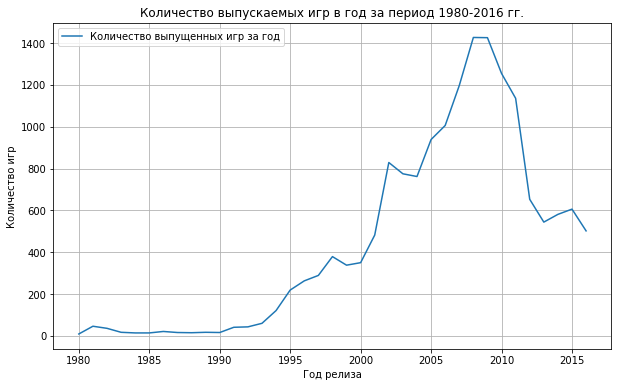

In [ ]:
# Строим график, наглядно представляющий сведения о количестве выпущенных игр для каждого года
data_count_of_games_per_year.pivot_table(index='year_of_release', values='Количество выпущенных игр за год').plot(figsize=(10, 6),
                                                                                              grid=1,
                                                                                              title='Количество выпускаемых игр в год за период 1980-2016 гг.',
                                                                                              xlabel='Год релиза',
                                                                                              ylabel='Количество игр');

Из вышеприведенного графика следует, что в период с 1980 по ~1993 год игр стабильно выходили из года в год в небольшом количестве (менее 50 шт.), с ~1994 года начался подъем игровой индустрии и количество выпускаемых игр резко "пошло вверх", небольшие "проседания" наблюдаются лишь в периодах 1997-2000 и 2002-2004 года. Пик количества выпускаемых игр пришелся на 2008, 2009 года со значениями в более чем 1400 игр в год. После 2009 года количество выпускаемых игр резко пошло на спад, подъем наблюдается в периоде 2013-2015 года, однако после 2015 года количество выпускаемых игр вновь стало уменьшаться.

##### Изучим как менялись продажи по платформам

In [ ]:
top_platforms = data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Посмотрев на продажи игр в разрезе платформ можем выделить пятерку лидеров по продажам: **PS2, X360, PS3, Wii и DS.** \
Визуализируем продажи указанных платформ.

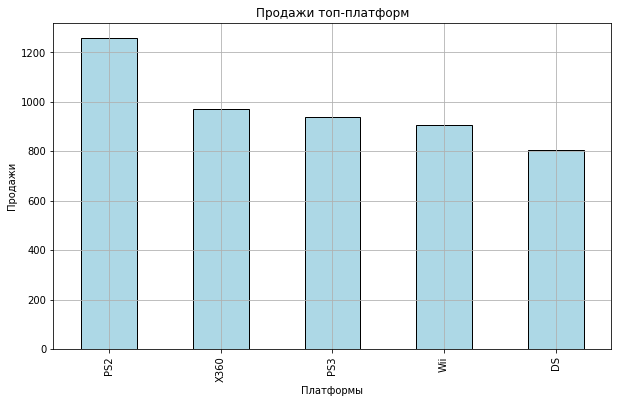

In [ ]:
top_platforms.to_frame().pivot_table(index='platform', values='total_sales').reset_index().rename(columns={'platform':' ', 'total_sales':'Продажи'}).set_index(' ').sort_values(by='Продажи', ascending=False).head().plot(kind='bar', color='lightblue', edgecolor='k', figsize=(10, 6), legend=False)
plt.title('Продажи топ-платформ')
plt.grid(True)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()

Построим для лидирующих платформ графики распределение продаж по годам.

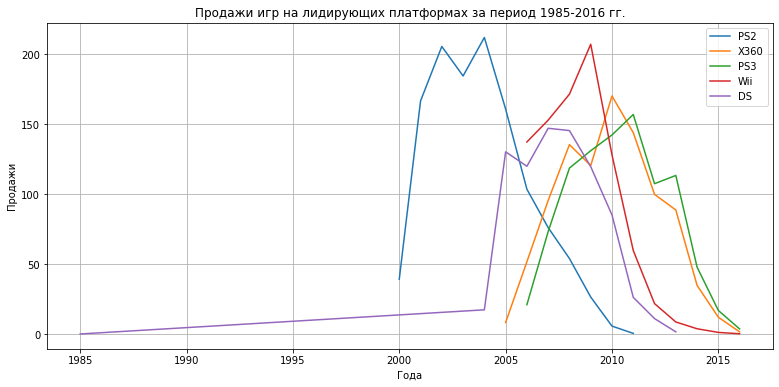

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot(data_games.query('platform == "PS2"').groupby('year_of_release')['total_sales'].sum(), label='PS2')
plt.plot(data_games.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum(), label='X360')
plt.plot(data_games.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum(), label='PS3')
plt.plot(data_games.query('platform == "Wii"').groupby('year_of_release')['total_sales'].sum(), label='Wii')
plt.plot(data_games.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum(), label='DS')
plt.title('Продажи игр на лидирующих платформах за период 1985-2016 гг.')
plt.xlabel('Года')
plt.ylabel('Продажи')
plt.grid()
plt.legend();

Из графиков видно, что продажи на каждой платформе соответствуют одной тенденции: платформы показывают высокие продажи в период, составляющий около 5-6 лет, после чего продажи идут на спад: PS2 - 2001-2006 года, Х360 - 2008-2013 года, PS3 - 2008-2014, Wii - 2006-2010 года, DS - 2005-2009 года. \
Указанное можно объяснить простым устареванием платформ и прихода им на смену платформ нового поколения.

Изучим какой в среднем срок "жизни" имеют представленные в датафрейме платформы.

In [ ]:
# Взглянем на датафрейм, содержащий сведения о годе релиза, годе "смерти" и сроке "жизни" каждой платформы
lifespan = data_games.groupby('platform')['year_of_release'].min()
data_lifespan = lifespan.to_frame(name='year of release')
data_lifespan['year of death'] = data_games.groupby('platform')['year_of_release'].max()
data_lifespan['lifespan'] = data_lifespan['year of death'] - data_lifespan['year of release']
# исключаем из датафрейма, платформы "прожившие" менее одного года
data_lifespan = data_lifespan.query('lifespan > 1')
data_lifespan

,year of release,year of death,lifespan
platform,,,
2600,1980,1989,9
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4
N64,1996,2002,6


Видим, что различные платформы имеют совершенно разные сроки жизни, например, отдельные платформы не могут похвастаться длительным сроком жизни, а вот PC и DS "живут" уже 31 и 28 лет соответственно! \
Посмотрим на среднее и медианное значение сроков "жизни".

In [ ]:
print('Средний срок "жизни" платформ составляет', data_lifespan['lifespan'].mean(), 'лет.')
print('Медианный срок "жизни" платформ составляет', data_lifespan['lifespan'].median(), 'лет.')

Средний срок "жизни" платформ составляет 9.0 лет.
Медианный срок "жизни" платформ составляет 8.5 лет.


##### Изучим какие платформы лидируют по продажам. Выберем потенциально прибыльные платформы

В результате исследования вышеидущих вопросов и с учетом того, что рынок компьютерных игр динамично развивается и одни тренды в геймдеве быстро заменяют другие, примем в качестве **актуального периода период с 2014 по 2016 гг. включительно.**

In [ ]:
# Создаем датафрейм, содержащий только актуальные данные, проверяем себя и смотрим общие сведения о получившемся датафрейме
data_games_actual = data_games[data_games.year_of_release > 2013].reset_index(drop = True)
print(data_games_actual['year_of_release'].unique())
data_games_actual.info()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 160.1+ KB


Получившийся датафрейм почти в 10 раз меньше исходного: 1689 строк против изначальных 16715 строк. Отмечаем, что при срезе данных по сведениям о годе из датафрейма отсеклись строки, содержащие пропуски в столбце 'year_of_release'.

In [ ]:
# Посмотрим сведения о продажах в разрезе платформ, содержащиеся в актуальных даннах
top_platforms_actual = data_games_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms_actual

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

Топ-5 платформ в актуальный период представлен следующими платформами (по убыванию): **PS4, XOne, 3DS, PS3 и X360**. Визуализируем сведения о продажах на актуальных топ-платформах.

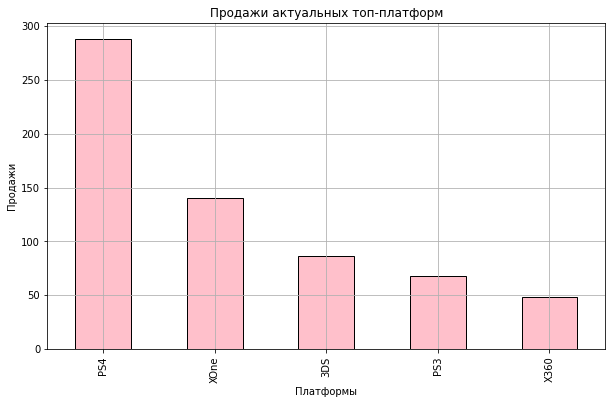

In [ ]:
top_platforms_actual.to_frame().pivot_table(index='platform', values='total_sales').reset_index().rename(columns={'platform':' ', 'total_sales':'Продажи'}).set_index(' ').sort_values(by='Продажи', ascending=False).head().plot(kind='bar', color='pink', edgecolor='k', figsize=(10, 6), legend=False)
plt.title('Продажи актуальных топ-платформ')
plt.grid(True)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()

**Видно, что PS4 и XOne являются безоговорочными лидерами по продажам, в особенности PS4, продажи которого в два раза превышают продажи XOne.**

Построим для актуальных лидирующих платформ графики распределение продаж по годам.

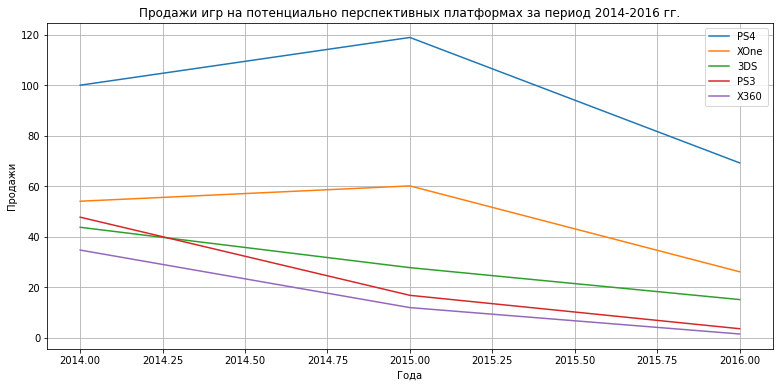

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot(data_games_actual.query('platform == "PS4"').groupby('year_of_release')['total_sales'].sum(), label='PS4')
plt.plot(data_games_actual.query('platform == "XOne"').groupby('year_of_release')['total_sales'].sum(), label='XOne')
plt.plot(data_games_actual.query('platform == "3DS"').groupby('year_of_release')['total_sales'].sum(), label='3DS')
plt.plot(data_games_actual.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum(), label='PS3')
plt.plot(data_games_actual.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum(), label='X360')
plt.title('Продажи игр на потенциально перспективных платформах за период 2014-2016 гг.')
plt.xlabel('Года')
plt.ylabel('Продажи')
plt.grid()
plt.legend();

Безусловные лидеры продаж это **PS4 и ХOne**. При этом PS4 имеет продажи почти в два раза выше, чем ХOne. Так на PS4 было продано 100-120 млн. копий в 2014 году и 70 млн. копий по состоянию на 2016 год. ХOne, в свою очередь, имеет продажи ~50-60 млн. копий в 2014 году и 30 млн. копий по состоянию на 2016 год. При этом из графиков видно, что по состоянию на 2016 год каждая из представленных платформ имеет продажи ниже, чем в начале рассматриваемого периода - в 2014 году. 3DS, PS3 и Х360 последние два года показывают исключительно падение в продажах. Наилучшие же продажи в рассматриваемый период показывают PS4 и ХOne, не удивительно - консоли нового поколения! До 2015 года продажи на данных двух платформах даже шли вверх и только в 2015 году начали снижаться.

Исходя из результатов рассмотрения сведений о продажах для актуальных платформ, полагем верным решением при планировании кампании на 2017 год делать ставку на следующии восемь платформ (расставлены в порядке приоритетности): **PS4, XOne, 3DS, PS3, X360, WiiU, PС и PSV.**

##### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

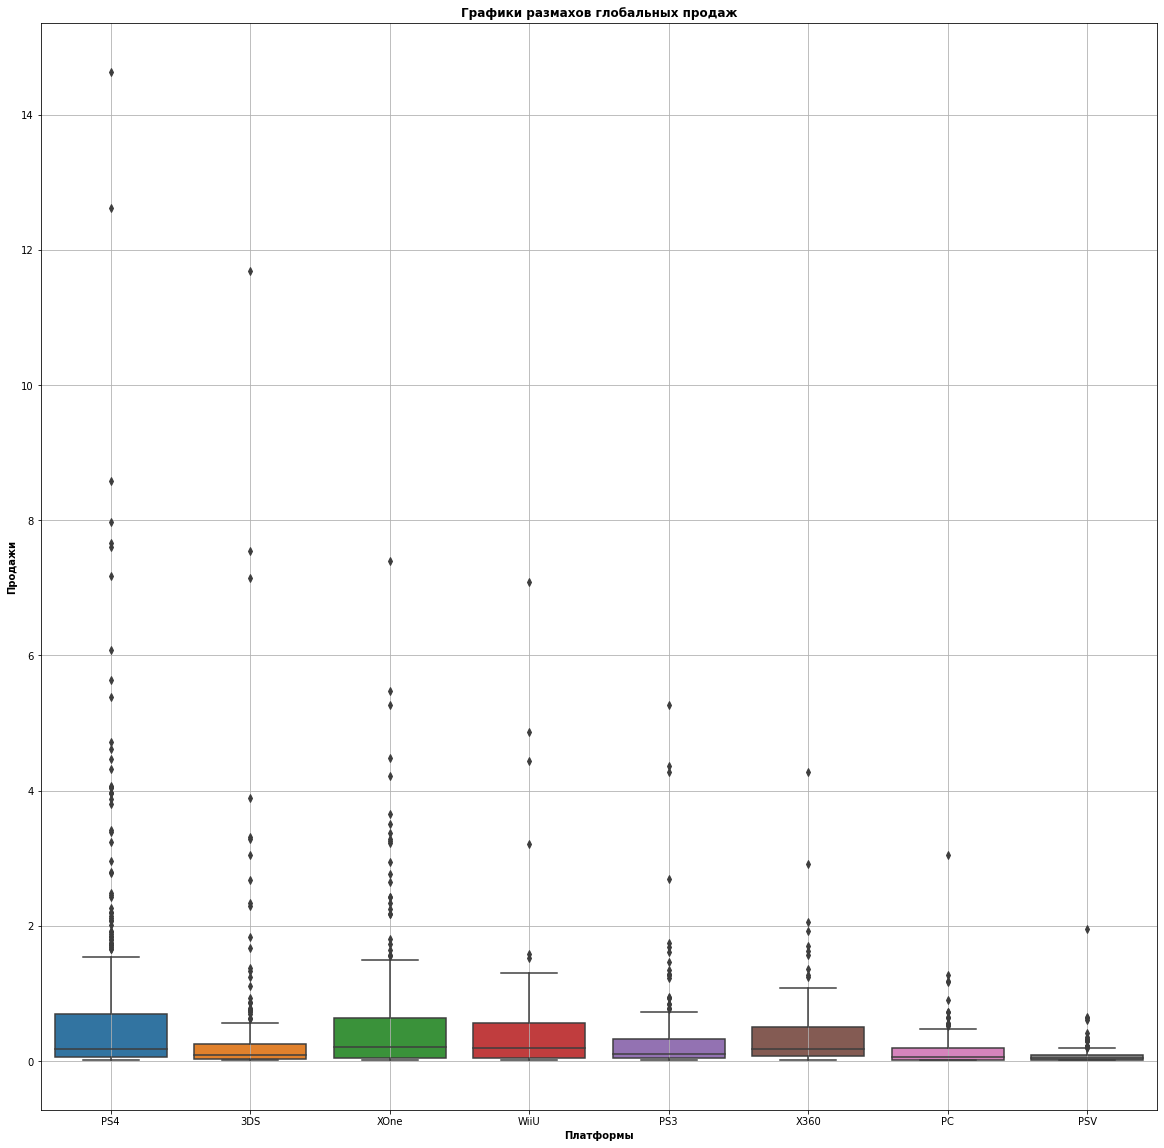

In [ ]:
# Для построения графика «ящик с усами» для восьми определенных на прошлом шаге платформ создадим датафрейм, содержащий
# только эти восемь платформ
data_games_actual_top_8 = data_games_actual.query('platform not in ["Wii", "PSP"]')
# Строим график «ящик с усами» по глобальным продажам игр для восьми определенных на прошлом шаге платформ
plt.figure(figsize=(20, 20))
sns.boxplot(data=data_games_actual_top_8, x='platform', y='total_sales')
plt.title('Графики размахов глобальных продаж', fontweight='bold')
plt.xlabel('Платформы', fontweight='bold')
plt.ylabel('Продажи', fontweight='bold')
plt.grid(True)
plt.show();

Из графиков видно, что глобальные продажи по каждой платформе содержат экстремальные результаты - выбросы, которые во много раз превышают медианное значение, указанное свидетельствует о сложности рынка игровой индустрии, так продажи на каждой платформе, на наш взгляд, сильно зависят от конкретного тайтла (игры), отдельные тайтлы могут приносить высокие продажи, которые в огромное количество раз будут отличаться от обычных значений продаж для конкретной платформы.

 Для изучения медианного значения продаж и 75% квантили выведем дополнительный график размаха глобальных продаж.

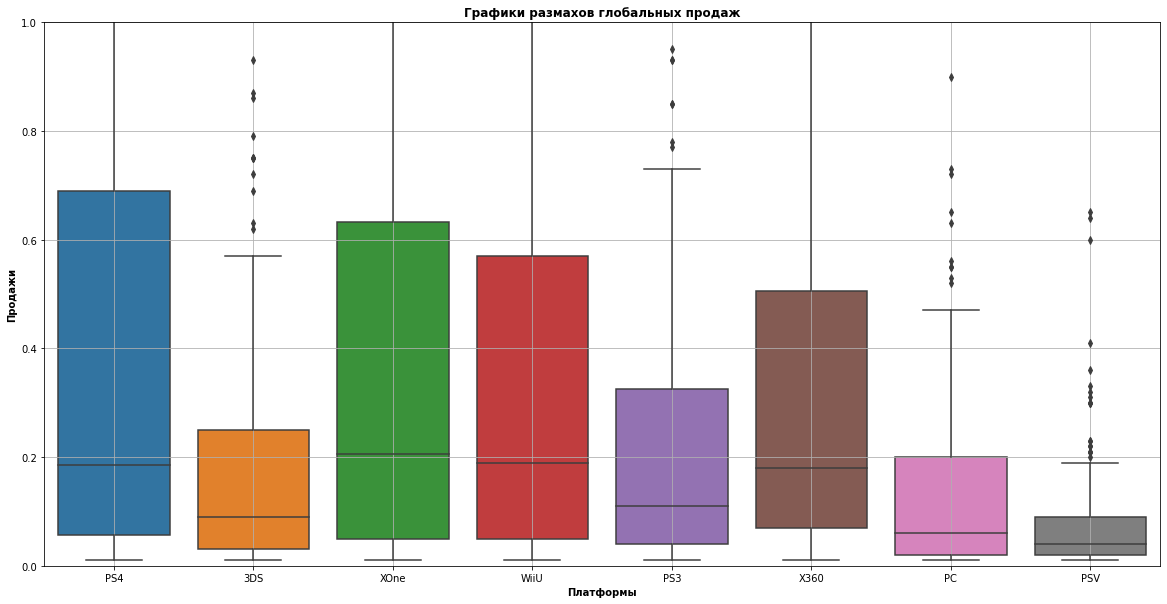

In [ ]:
# Строим график «ящик с усами» по глобальным продажам игр для восьми определенных на прошлом шаге платформ, отображена
# только нижняя часть boxplot-ов
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_games_actual_top_8, x='platform', y='total_sales')
plt.title('Графики размахов глобальных продаж', fontweight='bold')
plt.xlabel('Платформы', fontweight='bold')
plt.ylabel('Продажи', fontweight='bold')
plt.grid(True)
plt.ylim([0, 1])
plt.show();

Опишем результаты для платформ с самыми высокими продажами PS4 и XOne. \
Медианное значение продаж на PS4 составляет ~190000 копий, при этом 75% игр на PS4 продаются тиражом в ~690000 копий. \
Медианное значение продаж на XOne составляет ~205000 копий, при этом 75% игр на XOne продаются тиражом в ~630000 копий.

##### Посмотрим как влияют на продажи внутри платформы отзывы пользователей и критиков на примере PS4

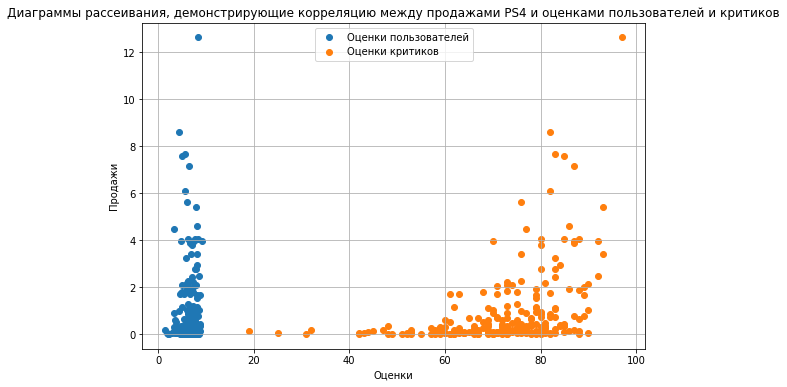

In [ ]:
# Создадим датафрейм, содержащий данные только о X360
data_games_PS4 = data_games_actual.query('platform == "PS4"')
# Постороим диаграммы рассеивания, демонстрирующие корреляцию между продажами и оценками пользователей и критиков
plt.figure(figsize=(9, 6))
plt.scatter(x=data_games_PS4['user_score'], y=data_games_PS4['total_sales'], label='Оценки пользователей')
plt.scatter(x=data_games_PS4['critic_score'], y=data_games_PS4['total_sales'], label='Оценки критиков')
plt.title('Диаграммы рассеивания, демонстрирующие корреляцию между продажами PS4 и оценками пользователей и критиков')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print('Корреляция между продажами PS4 и отзывами пользователей составляет', data_games_PS4['user_score'].corr(data_games_PS4['total_sales']))
print('Корреляция между продажами PS4 и отзывами критиков составляет', data_games_PS4['critic_score'].corr(data_games_PS4['total_sales']))

Корреляция между продажами PS4 и отзывами пользователей составляет -0.040131589472697356
Корреляция между продажами PS4 и отзывами критиков составляет 0.40266141068104083


Изучив корреляцию между продажами PS4 и оценками пользователей и критиков приходим к следующим **выводам:** согласно коэффициенту Пирсона продажи находятся в слабой отрицательной связи с оценками пользователей - ~-0.04, и в умеренной положительной связи с оценками критиков - ~0.40.

##### Посмотрим как влияют отзывы пользователей и критиков на продажи других потенциально перспективных пллатформ

###### Посмотрим как влияют на продажи внутри платформы отзывы пользователей и критиков на примере XOne

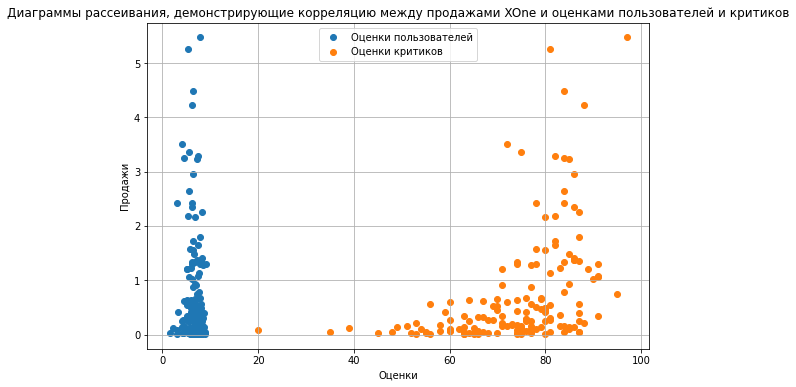

In [ ]:
# Создадим датафрейм, содержащий данные только о XOne
data_games_XOne = data_games_actual.query('platform == "XOne"')
# Постороим диаграммы рассеивания, демонстрирующие корреляцию между продажами и оценками пользователей и критиков
plt.figure(figsize=(9, 6))
plt.scatter(x=data_games_XOne['user_score'], y=data_games_XOne['total_sales'], label='Оценки пользователей')
plt.scatter(x=data_games_XOne['critic_score'], y=data_games_XOne['total_sales'], label='Оценки критиков')
plt.title('Диаграммы рассеивания, демонстрирующие корреляцию между продажами XOne и оценками пользователей и критиков')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print('Корреляция между продажами и отзывами пользователей составляет', data_games_XOne['user_score'].corr(data_games_XOne['total_sales']))
print('Корреляция между продажами и отзывами критиков составляет', data_games_XOne['critic_score'].corr(data_games_XOne['total_sales']))

Корреляция между продажами и отзывами пользователей составляет -0.0703839280647581
Корреляция между продажами и отзывами критиков составляет 0.42867694370333226


Изучив корреляцию между продажами XOne и оценками пользователей и критиков приходим к следующим **выводам:** согласно коэффициенту Пирсона продажи находятся в слабой отрицательной связи с оценками пользователей - ~-0.07, и в умеренной положительной связи с оценками критиков - ~0.42.

###### Посмотрим как влияют на продажи внутри платформы отзывы пользователей и критиков на примере 3DS

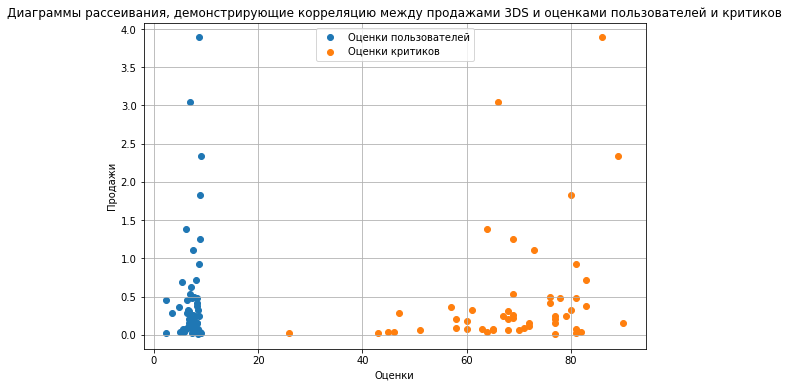

In [ ]:
# Создадим датафрейм, содержащий данные только о 3DS
data_games_3DS = data_games_actual.query('platform == "3DS"')
# Постороим диаграммы рассеивания, демонстрирующие корреляцию между продажами и оценками пользователей и критиков
plt.figure(figsize=(9, 6))
plt.scatter(x=data_games_3DS['user_score'], y=data_games_3DS['total_sales'], label='Оценки пользователей')
plt.scatter(x=data_games_3DS['critic_score'], y=data_games_3DS['total_sales'], label='Оценки критиков')
plt.title('Диаграммы рассеивания, демонстрирующие корреляцию между продажами 3DS и оценками пользователей и критиков')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print('Корреляция между продажами и отзывами пользователей составляет', data_games_3DS['user_score'].corr(data_games_3DS['total_sales']))
print('Корреляция между продажами и отзывами критиков составляет', data_games_3DS['critic_score'].corr(data_games_3DS['total_sales']))

Корреляция между продажами и отзывами пользователей составляет 0.2151932718527028
Корреляция между продажами и отзывами критиков составляет 0.314117492869051


Изучив корреляцию между продажами 3DS и оценками пользователей и критиков приходим к следующим **выводам:** согласно коэффициенту Пирсона продажи находятся в слабой положительной связи с оценками пользователей - ~0.21, и в умеренной положительной связи с оценками критиков - ~0.31.

###### Посмотрим как влияют на продажи внутри платформы отзывы пользователей и критиков на примере PS3

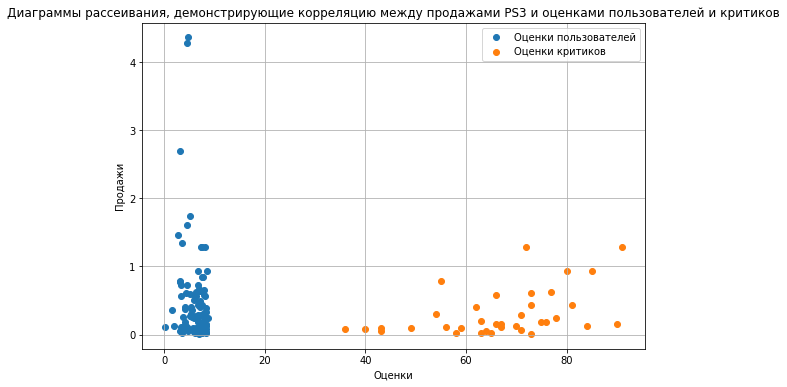

In [ ]:
# Создадим датафрейм, содержащий данные только о PS3
data_games_PS3 = data_games_actual.query('platform == "PS3"')
# Постороим диаграммы рассеивания, демонстрирующие корреляцию между продажами и оценками пользователей и критиков
plt.figure(figsize=(9, 6))
plt.scatter(x=data_games_PS3['user_score'], y=data_games_PS3['total_sales'], label='Оценки пользователей')
plt.scatter(x=data_games_PS3['critic_score'], y=data_games_PS3['total_sales'], label='Оценки критиков')
plt.title('Диаграммы рассеивания, демонстрирующие корреляцию между продажами PS3 и оценками пользователей и критиков')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print('Корреляция между продажами и отзывами пользователей составляет', data_games_PS3['user_score'].corr(data_games_PS3['total_sales']))
print('Корреляция между продажами и отзывами критиков составляет', data_games_PS3['critic_score'].corr(data_games_PS3['total_sales']))

Корреляция между продажами и отзывами пользователей составляет -0.16676141347662118
Корреляция между продажами и отзывами критиков составляет 0.44657460493190704


Изучив корреляцию между продажами PS3 и оценками пользователей и критиков приходим к следующим **выводам:** согласно коэффициенту Пирсона продажи находятся в слабой отрицательной связи с оценками пользователей - ~-0.16, и в умеренной положительной связи с оценками критиков - ~0.44.

###### Посмотрим как влияют на продажи внутри платформы отзывы пользователей и критиков на примере X360

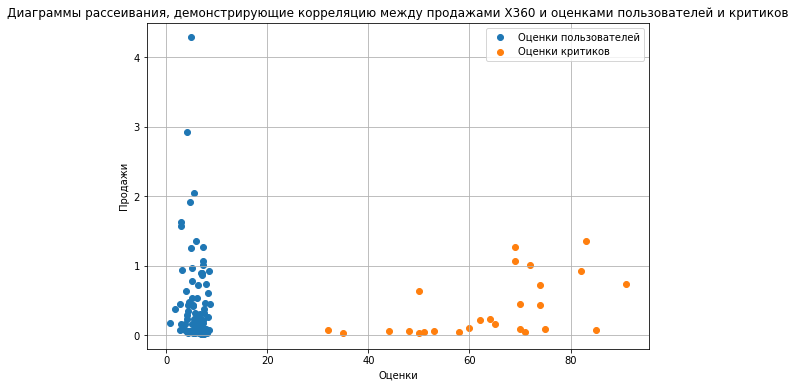

In [ ]:
# Создадим датафрейм, содержащий данные только о X360
data_games_X360 = data_games_actual.query('platform == "X360"')
# Постороим диаграммы рассеивания, демонстрирующие корреляцию между продажами и оценками пользователей и критиков
plt.figure(figsize=(9, 6))
plt.scatter(x=data_games_X360['user_score'], y=data_games_X360['total_sales'], label='Оценки пользователей')
plt.scatter(x=data_games_X360['critic_score'], y=data_games_X360['total_sales'], label='Оценки критиков')
plt.title('Диаграммы рассеивания, демонстрирующие корреляцию между продажами X360 и оценками пользователей и критиков')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print('Корреляция между продажами и отзывами пользователей составляет', data_games_X360['user_score'].corr(data_games_X360['total_sales']))
print('Корреляция между продажами и отзывами критиков составляет', data_games_X360['critic_score'].corr(data_games_X360['total_sales']))

Корреляция между продажами и отзывами пользователей составляет -0.138444570945665
Корреляция между продажами и отзывами критиков составляет 0.5257228356581523


Изучив корреляцию между продажами X360 и оценками пользователей и критиков приходим к следующим **выводам:** согласно коэффициенту Пирсона продажи находятся в слабой отрицательной связи с оценками пользователей - ~-0.13, и в умеренной положительной связи с оценками критиков - ~0.52.

##### Посмотрим на общее распределение игр по жанрам

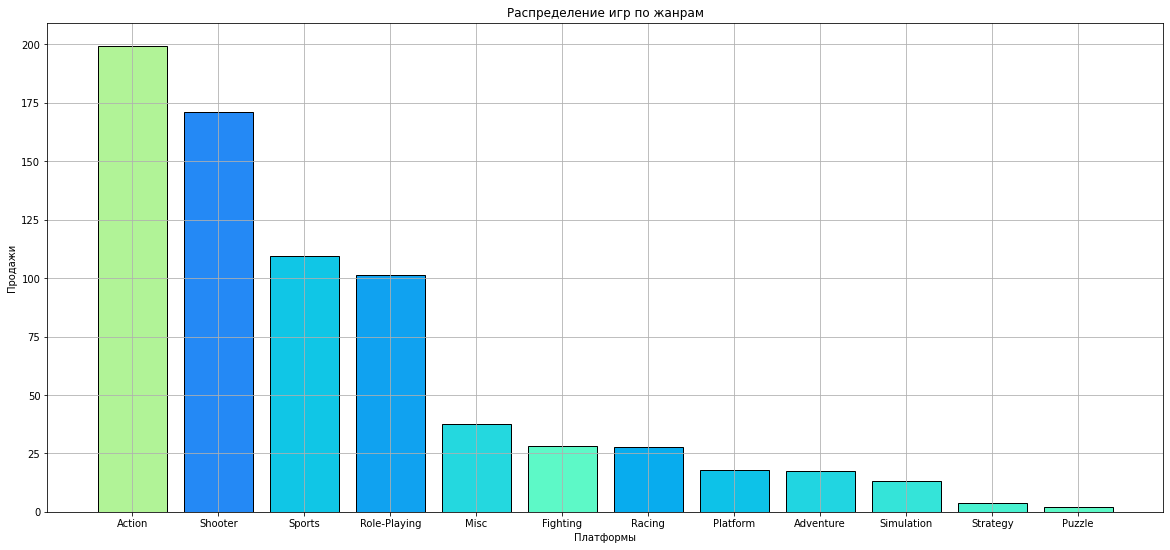

In [ ]:
# Получаем значение продаж по каждому жанру за актуальный период и строим столбчатую диаграмму продаж в разрезе жанров
games_actual_genre = data_games_actual.groupby('genre')['total_sales'].sum()
data_games_actual_genre = games_actual_genre.to_frame().reset_index().rename(columns={'genre':'Жанр', 'total_sales':'Продажи'}).sort_values(by='Продажи', ascending=False)
groups = data_games_actual_genre['Жанр']
counts = data_games_actual_genre['Продажи']
radii1 = np.array([76, 23, 36, 28, 41, 55, 30, 35, 40, 45, 50, 55, 65, 34])
cmap = plt.get_cmap('rainbow')
plt.figure(figsize=(20, 9))
plt.title('Распределение игр по жанрам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.grid(True)
plt.bar(groups, counts, edgecolor='k', color=cmap(radii1*2));

Видим, что наиболее продаваемыми жанрами игр является жанр action - почти 200 млн. проданных копий, далее с показателями продаж в ~173, ~112 и ~101 млн. копий идут спортивные игры, шутеры и РПГ соответственно. Самые низкие продажи согласно сведениям в нашем датафрейме приносят симуляторы, стратегии и puzzle - ~17, ~5 и ~3 млн. проданных копий соответственно.

В связи с тем, что высокие продажи могут быть вызваны просто огромным количеством игр отдельного жанра, они не могут являться однозначным показателем успешности. Чтобы проверить это рассмотрим средние и медианные значения продаж по жанрам

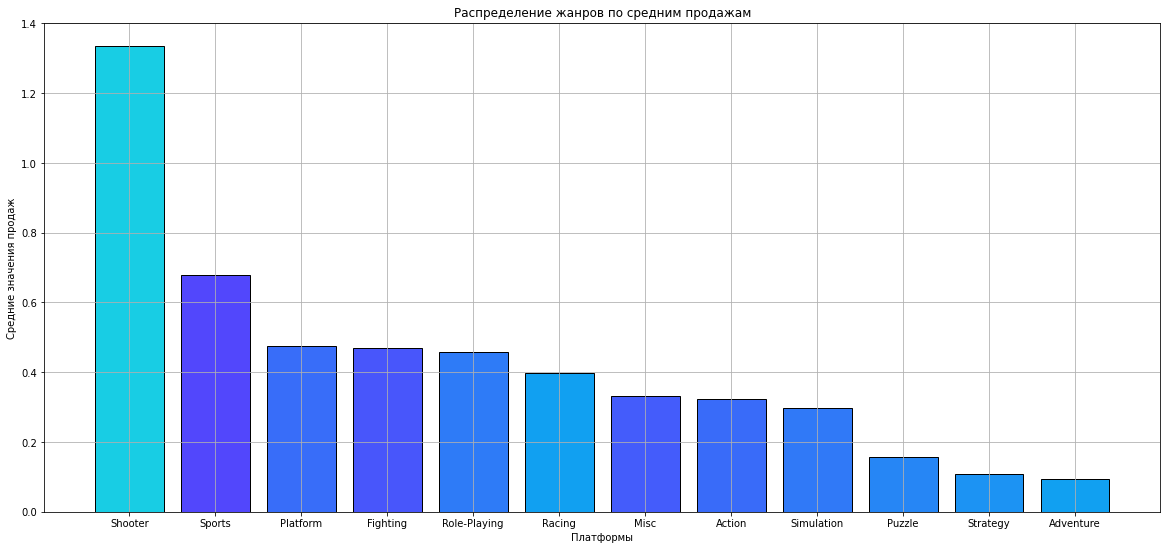

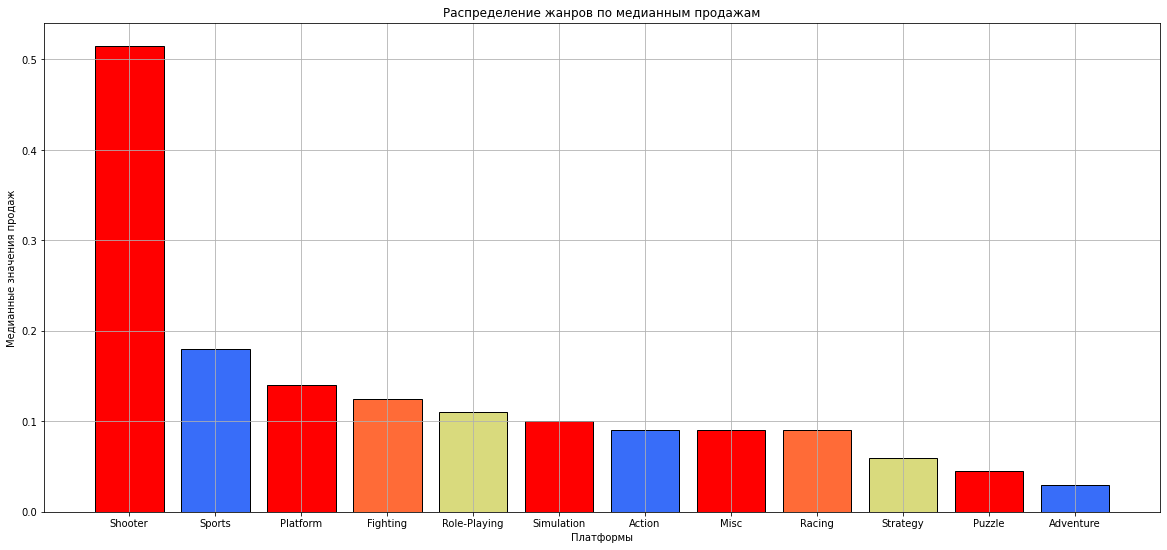

In [ ]:
# Получаем среднии и медианные значения продаж по каждому жанру за актуальный период
games_actual_genre_mean = data_games_actual.groupby('genre')['total_sales'].mean()
games_actual_genre_median = data_games_actual.groupby('genre')['total_sales'].median()
data_games_actual_genre_mean = games_actual_genre_mean.to_frame().reset_index().rename(columns={'genre':'Жанр', 'total_sales':'Средние значения продаж'}).sort_values(by='Средние значения продаж', ascending=False)
data_games_actual_genre_median = games_actual_genre_median.to_frame().reset_index().rename(columns={'genre':'Жанр', 'total_sales':'Медианные значения продаж'}).sort_values(by='Медианные значения продаж', ascending=False)
# Строим столбчатую диаграмму средних продаж в разрезе жанров
groups = data_games_actual_genre_mean['Жанр']
counts = data_games_actual_genre_mean['Средние значения продаж']
radii1 = np.array([76, 23, 36, 28, 41, 55, 30, 35, 40, 45, 50, 55, 65, 34])
cmap = plt.get_cmap('rainbow')
plt.figure(figsize=(20, 9))
plt.title('Распределение жанров по средним продажам')
plt.xlabel('Платформы')
plt.ylabel('Средние значения продаж')
plt.grid(True)
plt.bar(groups, counts, edgecolor='k', color=cmap(radii1*1));
# Строим столбчатую диаграмму медианных продаж в разрезе жанров
groups = data_games_actual_genre_median['Жанр']
counts = data_games_actual_genre_median['Медианные значения продаж']
radii1 = np.array([67, 9, 100, 55, 43])
cmap = plt.get_cmap('rainbow')
plt.figure(figsize=(20, 9))
plt.title('Распределение жанров по медианным продажам')
plt.xlabel('Платформы')
plt.ylabel('Медианные значения продаж')
plt.grid(True)
plt.bar(groups, counts, edgecolor='k', color=cmap(radii1*4));

Действительно! Жанры на графиках распределились в порядке, отличном от графика сумммарных продаж. Аction с первого места "опустился" сразу на восьмое по среднему значению и седьмое - по медианному! Тройка лидеров и по среднему и по медианному значению продаж представлена следующими жанрамами (по убыванию): шутеры, спортивные игры и platform, а замыкают "рейтинги" по среднему значению (по убыванию) puzzle, стратегии и adventure, по медианному значению (по убыванию) стратегии, puzzle и adventure.

**Вывод по этапу:** на этапе исследовательского анализа данных установлены следующие характеристики рассмтриваемых данных:

в период с 1980 по ~1993 год новые игры выпускались ежегодно в количестве до 50 шт., с ~1994 года количество выпускаемых игр в год стабильно стало увеличиваться (небольшие "проседания" наблюдаются лишь в периодах 1997-2000 и 2002-2004 годах). Пик количества выпускаемых игр пришелся на 2008, 2009 года со значениями в более чем 1400 игр в год. После 2009 года количество выпускаемых игр пошло на спад, подъем наблюдается в периоде 2013-2015 года, однако после 2015 года количество выпускаемых игр вновь стало уменьшаться;

самые высокие продажи за период **1985-2016 гг.** показывают (в порядке убывания) **PS2, Х360, PS3, Wii и DS.** При этом продажи каждой платформы соответствуют одной тенденции: платформа приносит высокие продажи в период, составляющий около 5-6 лет, после чего продажи идут на спад, что можно объяснить устареванием платформ и прихода им на смену платформ нового поколения. \
В целом средний срок "жизни" платформ составляет **9 лет.,** а медианное значение срока "жизни" платформы равно **8.5 годам.**

**В результате выполненного исследования данных и с учетом того, что рынок компьютерных игр динамично развивается и одни тренды в геймдеве быстро заменяют другие в качестве актуального периода принят период 2014-2016 гг. включительно.** \
Установлены следующие характеристики актуальных данных:

самые высокие продажи за актуальный период имеют (в порядке убывания) **PS4, XOne, 3DS, PS3 и X360,** при этом PS4 и XOne являются безоговорочными лидерами по продажам, в особенности PS4, продажи которого в два рза превышают продажи XOne (288.15 и 140.36 млн. копий соответственно). Однако стоит отметить, что по состоянию на 2016 год каждая актуальная топ-платформа показывает уменьшение продаж;

потенциально прибыльными консолями для планирования кампании на 2017 год определены (расставлены в порядке приоритетности): **PS4, XOne, 3DS, PS3, X360, WiiU, PС и PSV;**

диаграммы размаха (box plot) показывают, что глобальные продажи по каждой платформе содержат экстремальные результаты - выбросы, которые во много раз превышают медианное значение, указанное, на наш взгляд, свидетельствует о том, что продажи сильно зависят от конкретного тайтла (игры), отдельные тайтлы могут приносить высокие продажи, которые в огромное количество раз будут отличаться от обычных значений продаж для отдельной платформы. Медианные значения продаж потенциально перспективных платформ варьируются от 15000 (PSV) до 205000 (XOne). У двух лидеров продаж - PS4 и XOne 75%-й квантиль соответствует значениям в 690000 и 630000 копий соответственно. Интересно отметить, что пускай у PS4 суммарные продажи в два раза выше, чем у ХOne, но медианное значение продаж у XOne выше (~190000 против ~205000 копий);

суммарные продажи PS4, XOne, 3DS, PS3 и X360 имеют умеренно положительную связь с оценками критиков, оценки пользователей имеют слабую положительную корреляцию с продажами 3DS и слабую отрицательную корреляцию с продажами PS4, XOne, PS3 и X360;

наиболее продаваемыми жанрами игр является жанр **action - почти 200 млн. проданных копий,** далее с показателями продаж в **~173, ~112 и ~101 млн.** копий идут **спортивные игры, шутеры и РПГ соответственно.** Самые низкие продажи согласно графику приносят **симуляторы, стратегии и puzzle - ~17, ~5 и ~3 млн. проданных копий** соответственно. Вместе с тем лучшие средние и медианные значения продаж имеют (по убыванию): **шутеры, спортивные игры и platform,** худшие средние значения (по убыванию) - **puzzle, стратегии и adventure,**  медианные значения (по убыванию) - **стратегии, puzzle и adventure.**

#### Шаг 4. Составление портретов пользователей каждого региона

##### Определим самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

Для определения самых популярных платформ в каждом регионе попробуем воспользоваться тепловой картой.

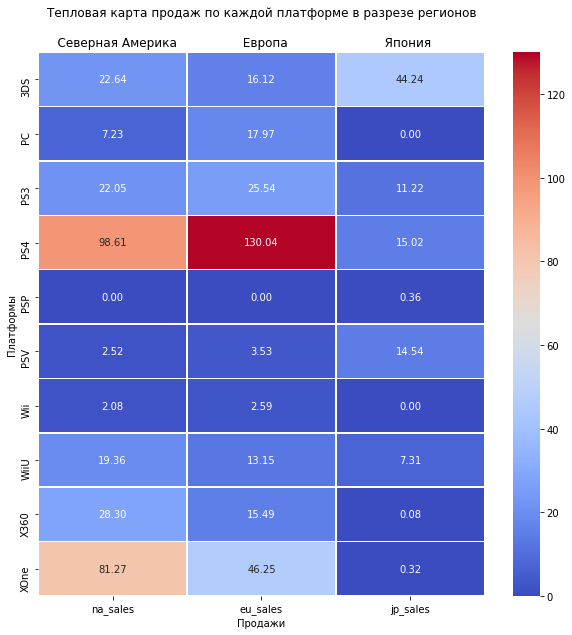

In [ ]:
data_games_actual_region = data_games_actual.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].apply(sum)
plt.figure(figsize=(10, 10))
sns.heatmap(data_games_actual_region, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title("""Тепловая карта продаж по каждой платформе в разрезе регионов

"""'            Северная Америка                 Европа                         Япония                     ')
plt.xlabel('Продажи')
plt.ylabel('Платформы')
plt.show()

В **Северной Америке** отчетливо видны лидеры продаж (по убыванию): PS4 и XOne с показателями в 98.61, и 81.27 млн. копий соответственно. \
В **Европе** выделяется явный лидер: PS4 (130.04 млн. копий). \
Однако в отношении продаж в **Японии** тепловая карта не информативна, так как продажи по каждой платформе в этом регионе намного ниже, чем в Северной Америке и Европе, в связи с чем все данные по Японии оказались в "синей" зоне, которая содержит сведения о низких продажах.

Для надлежащего определения топ-5 платформ для каждого региона отсортируем продажи по убыванию для каждого региона и выведем по пять "верхних" значений.

In [ ]:
na_sales = data_games_actual_region.pivot_table(index='platform', values='na_sales').reset_index().rename(columns={'platform':' ', 'na_sales':'Продажи'}).set_index(' ').sort_values(by='Продажи', ascending=False)
eu_sales = data_games_actual_region.pivot_table(index='platform', values='eu_sales').reset_index().rename(columns={'platform':' ', 'eu_sales':'Продажи'}).set_index(' ').sort_values(by='Продажи', ascending=False)
jp_sales = data_games_actual_region.pivot_table(index='platform', values='jp_sales').reset_index().rename(columns={'platform':' ', 'jp_sales':'Продажи'}).set_index(' ').sort_values(by='Продажи', ascending=False)
print('Топ-5 платформ в Северной Америке')
na_sales.head()

Топ-5 платформ в Северной Америке


,Продажи
,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [ ]:
print('Топ-5 платформ в Европе')
eu_sales.head()

Топ-5 платформ в Европе


,Продажи
,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [ ]:
print('Топ-5 платформ в Японии')
jp_sales.head()

Топ-5 платформ в Японии


,Продажи
,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Визуализируем полученные значения продаж по регионам.

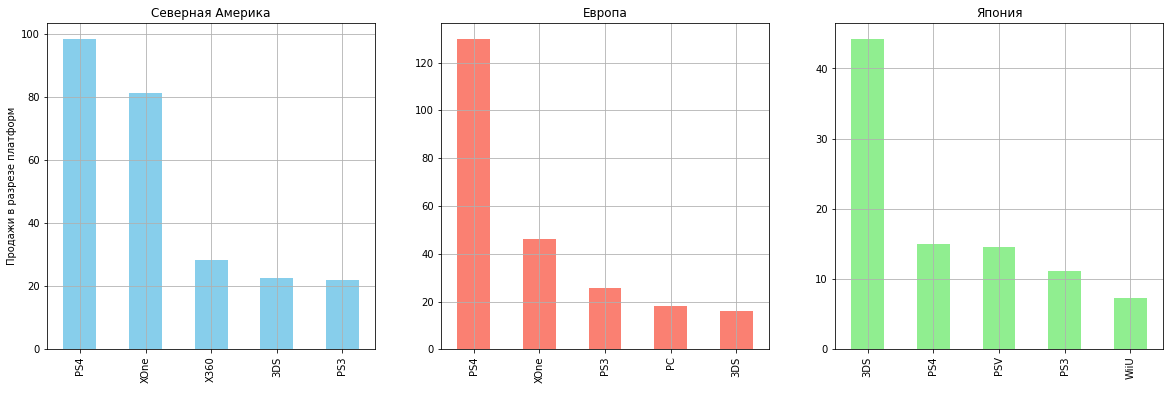

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
na_sales.query('Продажи > 22.04').plot(kind='bar', ax=axs[0], color='skyblue', legend=False)
eu_sales.query('Продажи > 16.11').plot(kind='bar', ax=axs[1], color='salmon', legend=False)
jp_sales.query('Продажи > 7.30').plot(kind='bar', ax=axs[2], color='lightgreen', legend=False)
axs[0].set_title('Северная Америка')
axs[1].set_title('Европа')
axs[2].set_title('Япония')
axs[0].set_ylabel('Продажи в разрезе платформ')
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
plt.show()

Изучив продажи в регионах приходим к следующим **выводам:** топ-5 по продажам Северной Америки и Европы представлены почти одними и теми же платформами: PS4, XOne, PS3 и 3DS, отличие только в одной платформе: в Северной Америке в топ-5 входит X360, тогда как в Европе РC. топ-5 Японии также представлен 3DS, PS3 и PS4, однако также в пятерку лидеров в Японии вошли PSV и WiiU. \
В части объемов интересно отметить, что PS4 абсолютно доминирует на рынке Европы: 130.04 млн. копий против 46.25 млн. копий XOne, который на рынке Европы занимает второе место. На рынке Северной Америки лидируют PS4 и XOne с показателями в 98.61, и 81.27, однако они имеют гораждо меньший отрыв от третего места, чем PS4 в Европе от второго, а именно в примерно 70 и 50 млн. копий (третье место Х360 - 28.30 млн. копий) \
По суммарным же продажам актуальных топ платформ первое место занимает рынок Северной Америки. \
Самый же маленький рынок по суммарным продажам это рынок Японии, который составляет менее 100 млн. копий суммарно. При этом лидером в Японии являтеся портативная платформа 3DS.

##### Определим самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

Выведем на экран топ-5 жанров для каждого региона.

In [ ]:
games_actual_na_genre = data_games_actual.groupby('genre')['na_sales'].sum()
games_actual_eu_genre = data_games_actual.groupby('genre')['eu_sales'].sum()
games_actual_jp_genre = data_games_actual.groupby('genre')['jp_sales'].sum()
na_genre = games_actual_na_genre.to_frame().rename(columns={'na_sales':'Продажи в Северной Америке'}).sort_values(by='Продажи в Северной Америке', ascending=False).reset_index().rename(columns={'genre':' '}).set_index(' ').head()
na_genre

,Продажи в Северной Америке
,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [ ]:
eu_genre = games_actual_eu_genre.to_frame().rename(columns={'eu_sales':'Продажи в Европе'}).sort_values(by='Продажи в Европе', ascending=False).reset_index().rename(columns={'genre':' '}).set_index(' ').head()
eu_genre

,Продажи в Европе
,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [ ]:
jp_genre = games_actual_jp_genre.to_frame().rename(columns={'jp_sales':'Продажи в Японии'}).sort_values(by='Продажи в Японии', ascending=False).reset_index().rename(columns={'genre':' '}).set_index(' ').head()
jp_genre

,Продажи в Японии
,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Визуализируем полученные значения.

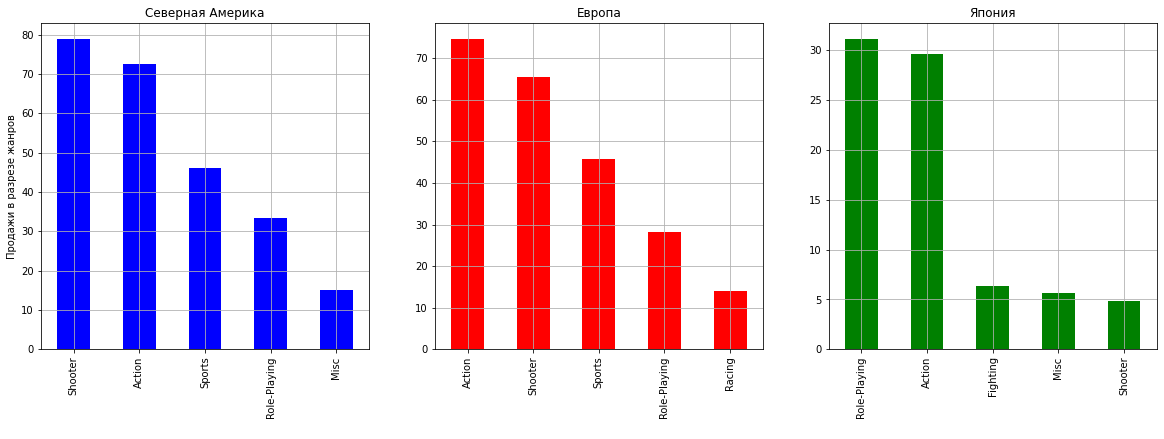

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
na_genre.plot(kind='bar', ax=axs[0], color='blue', legend=False)
eu_genre.plot(kind='bar', ax=axs[1], color='red', legend=False)
jp_genre.plot(kind='bar', ax=axs[2], color='green', legend=False)
axs[0].set_title('Северная Америка')
axs[1].set_title('Европа')
axs[2].set_title('Япония')
axs[0].set_ylabel('Продажи в разрезе жанров')
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
plt.show()

**Вывод:** из вышепредставленной информации видим, что топ-5 жанров Северной Америки и Европы совпали почти полностью и представляют собой (по убыванию): шутеры (1 место в Северной Америке и 2 место в Европе), аction (2 место в Северной Америке и 1 место в Европе), спортивные игры и РПГ. На пятой же позиции в Северной Америке разместились игры жанра misc, а в Европе - гоночные игры. Топ-5 Японии же выглядит иначе (по убыванию): РПГ, action, fighting, misc и шутеры. Полагаем, что такое отличие в предпочтении в жанрах игр в Японии от иных регионов можно объяснить исключительно особенностями менталитета японцев, так как для связи этих особенностей с какими-либо иными факторами (экономическими, финансовыми и т.п.) нет оснований. Видимо исторически сложилось, что японцы любят РПГ (например, Final Fantasy), а вот, например, спортивными играми не интересуются.

##### Определим влияет ли рейтинг ESRB на продажи в отдельном регионе (NA, EU, JP)

In [ ]:
# Изучаем какие значения принимает столбец 'rating'
data_games_actual['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

Игры в датафрейме могут иметь следующие рейтинги: Е - "Для всех", Е10+ - "Для всех от 10 лет и старше", Т - "Подростки" и М - "Для взрослых".

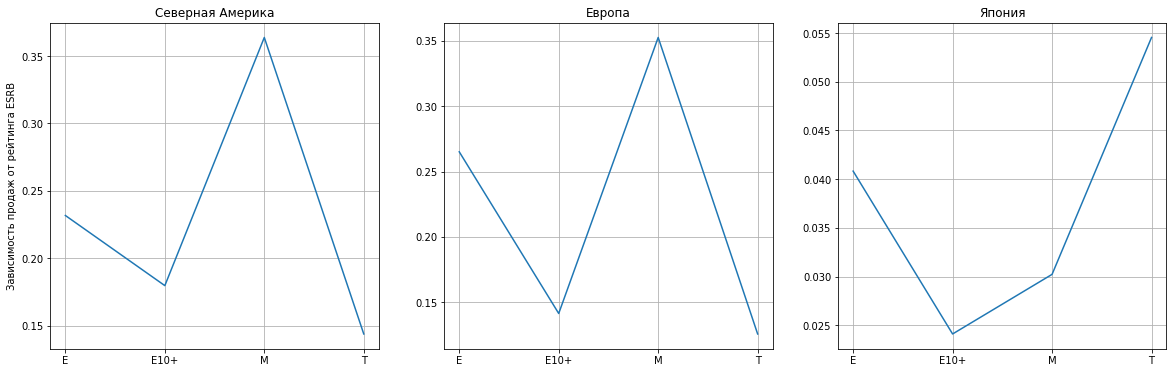

In [ ]:
# Создаем сводные таблицы для постраения графиков
na_esrb = data_games_actual.pivot_table(index='rating', values='na_sales')
eu_esrb = data_games_actual.pivot_table(index='rating', values='eu_sales')
jp_esrb = data_games_actual.pivot_table(index='rating', values='jp_sales')
# Строим графики
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
axs[0].plot(na_esrb)
axs[1].plot(eu_esrb)
axs[2].plot(jp_esrb)
axs[0].set_title('Северная Америка')
axs[1].set_title('Европа')
axs[2].set_title('Япония')
axs[0].set_ylabel('Зависимость продаж от рейтинга ESRB')
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
plt.show()

Делаем следующие **выводы** о влиянии рейтинга ESRB на продажи в отдельном регионе: зависимость продаж от ESRB на рынках Северной Америки и Европы имеет сильно схожие тенденции - самые высокии продажи показывают игры с рейтингом "Для взрослых", а самые низкие - с рейтингом "Подростки". Продажи на рынке Японии отличаются от картин других регионов, так, высокие продажи в Японии показывают игры жанра "Подростки", а игры "Для взрослых" занимают третью из четырех позиций. Игры с рейтингом "Для всех от 10 лет и старше" имеют самые низкие продажи в Японии.

**Вывод по этапу:** составлены следующие портреты пользователей из Северной Америки, Европы и Японии.

**Северная Америка (NA):** рынок Северной Америки - самый большой рынок  из представленных в датафрейме, лидер продаж в Северной Америке - PS4 с показателем в 98.61 млн. копий. \
Топ-5 платформ у пользователей из Северной Америки представлены PS4, XOne, X360, 3DS и РS3. \
Топ-5 жанров у пользователей из Северной Америки (по убыванию): шутеры,	аction, спортивные игры, РПГ и Misc. \
В разрезе возрастных категорий самые высокие продажи на рынке Северной Америки показывают игры с рейтингом "Для взрослых", а самые низкие с рейтингом "Подростки".


**Европа (EU):** по объему продаж рынок Европы занимает второе место. Самые высокие продажи в Европе показывает PS4 - 130.04 млн. копий. \
Топ-5 платформ у пользователей из Европы представлены PS4, XOne, РS3, PC и 3DS. \
Топ-5 жанров у пользователей из Европы (по убыванию): аction, шутеры, спортивные игры, РПГ и гоночные игры. \
В разрезе возрастных категорий самые высокие продажи на рынке Европы показывают игры с рейтингом "Для взрослых", а самые низкие с рейтингом "Подростки".

**Япония (JP):** рынок Японии - самый маленький рынок, лучшие продажи в Японии показывает 3DS - 44.24 млн. копий. \
Топ-5 платформ у пользователей из Японии представлены 3DS, PS4, PSV, PS3 и WiiU. \
Топ-5 жанров у пользователей из Японии (по убыванию): РПГ, action, fighting, misc и шутеры. \
В разрезе возрастных категорий самые высокие продажи на рынке Японии показывают игры с рейтингом "Подростки", а самые низкие с рейтингом "Для всех от 10 лет и старше".

В целом можно утверждать, что портреты пользователей из Северной Америки и Европы во многом идентичны - в предпочтении платформ, жанров, во влиянии рейтинга ESRB. Японские же игроки предпочитают игры иных жанров и возрастных категорий, а лидирующей платформой является портативная платформа 3DS в отличии от стационарной PS4 в Северной Америке и Европе.

#### Шаг 5. Проверка гипотез

##### Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

In [ ]:
# Для проверки гипотезы создадим два датафрейма: c данными только о Xbox One и с данными только о PC, и без пропусков
data_games_xone = data_games_actual.query('platform == "XOne"').dropna(subset=['user_score'])
data_games_pc = data_games_actual.query('platform == "PC"').dropna(subset=['user_score'])

Необходимые датафреймы созданы.

Сформулируем нулевую гипотезу (H₀) как "средние двух генеральных совокупностей (пользовательские рейтинги платформ Xbox One и PC) равны", а альтернативную гипотезу (Н1) как "средние двух генеральных совокупностей (пользовательские рейтинги платформ Xbox One и PC) не равны" и проведем статистический тест.

In [ ]:
# задаем уровень статистической значимости 0.01
alpha = 0.01

results = st.ttest_ind(data_games_xone['user_score'], data_games_pc['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.10450507919348415
Нет оснований отвергнуть нулевую гипотезу


Согласно статистическому тесту средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Мы обладаем обеими генеральными совокупностями и можем рассчитать средний пользовательский рейтинг платформ Xbox One и PC.

In [ ]:
print('Средний пользовательский рейтинг Xbox One равен', data_games_xone['user_score'].mean())
print('Средний пользовательский рейтинг РС равен', data_games_pc['user_score'].mean())

Средний пользовательский рейтинг Xbox One равен 6.594545454545456
Средний пользовательский рейтинг РС равен 6.298360655737705


**Вывод:** не можем отбросить нулевую гипотезу (H₀) "средние двух генеральных совокупностей (пользовательские рейтинги платформ Xbox One и PC) равны" - рейтинги обоих платформ составляют ~6 баллов с разницей всего в ~0.30 балла.

##### Проверим гипотезу "Средние пользовательские рейтинги жанров action и sports разные"

In [ ]:
# Для проверки гипотезы создадим два датафрейма: c данными только об action и с данными только о sports, и без пропусков
data_games_action = data_games_actual.query('genre == "Action"').dropna(subset=['user_score'])
data_games_sports = data_games_actual.query('genre == "Sports"').dropna(subset=['user_score'])

Необходимые датафреймы созданы.

Сформулируем нулевую гипотезу (H₀) как "средние двух генеральных совокупностей (пользовательские рейтинги жанров action и sports) равны", а альтернативную гипотезу (Н1) как "средние двух генеральных совокупностей (пользовательские рейтинги жанров action и sports) разные" и проведем статистический тест.

In [ ]:
# задаем уровень статистической значимости 0.01
alpha = 0.01

results = st.ttest_ind(data_games_action['user_score'], data_games_sports['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Согласно статистическому тесту средние пользовательские рейтинги жанров action и sports разные. Мы обладаем обеими генеральными совокупностями и можем рассчитать средний пользовательский рейтинг жанров action и sports.

In [ ]:
print('Средний пользовательский рейтинг жанра action равен', data_games_action['user_score'].mean())
print('Средний пользовательский рейтинг жанра sports равен', data_games_sports['user_score'].mean())

Средний пользовательский рейтинг жанра action равен 6.760606060606061
Средний пользовательский рейтинг жанра sports равен 5.2251968503937


**Вывод:** отбрасываем нулевую гипотезу (H₀) "средние двух генеральных совокупностей (пользовательские рейтинги жанров action и sports) равны" - рейтинг жанра action составляет 6.76 баллов, жанра sports - 5.22 балла, разница составляет ~1.54 балла.

***В целях самопроверки проведем повторные статистические тесты на сфабрикованных данных, в которых пользовательские рейтинги платформ Xbox One и PC будут намерено сделаны сильно отличными друг от друга, а пользовательские рейтинги жанров action и sports приближены друг у другу.***

In [ ]:
data_games_pc = data_games_pc.query('user_score < 3.0')
data_games_action = data_games_action.query('user_score < 6.0')
data_games_sports = data_games_sports.query('user_score < 6.3')

alpha = 0.01

results = st.ttest_ind(data_games_xone['user_score'], data_games_pc['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.5938290019773068e-11
Отвергаем нулевую гипотезу


In [ ]:
alpha = 0.01

results = st.ttest_ind(data_games_action['user_score'], data_games_sports['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.08703184582171337
Нет оснований отвергнуть нулевую гипотезу


In [ ]:
print('Средний пользовательский рейтинг Xbox One равен', data_games_xone['user_score'].mean())
print('Средний пользовательский рейтинг РС равен', data_games_pc['user_score'].mean())
print('Средний пользовательский рейтинг жанра action равен', data_games_action['user_score'].mean())
print('Средний пользовательский рейтинг жанра sports равен', data_games_sports['user_score'].mean())

Средний пользовательский рейтинг Xbox One равен 6.594545454545456
Средний пользовательский рейтинг РС равен 2.12
Средний пользовательский рейтинг жанра action равен 4.679104477611941
Средний пользовательский рейтинг жанра sports равен 4.30919540229885


***На сфабрикованных данных статистические тесты показали противоположные результаты. В этой связи, полагаем, что гипотезы проверены верно.***

***Пояснения***

Нулевые и альтернативные гипотезы были сформулированы, исходя из правила, предусматривающего, что нулевая гипотеза всегда должна содержать знак равенства ("="). \
По сути при проведении статистического теста проверяется именно нулевая гипотеза, а не изначальная гипотеза, звучащая в задании (т.к. изначальная может и не содержать знака равенства, как гипотеза на шаге 5.2 - о проверке на разность (неравенство) рейтингов двух жанров). Имея результат статистического теста о возможности либо невозможности отбросить нулевую гипотезу мы, соответственно, приходим к выводу о том как поступать с альтернативной гипотезой (отбрасывать или не отбрасывать) и уже после того, как мы узнаем какая гипотеза отбрасывается, а какая нет (нулевая или альтернативная) мы смотрим как полученный результат согласуется с изначальной гипотезой из задания.

Для проверки гипотез был использован метод проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind, в качестве аргументов ему были переданы сведения из столбцов 'user_score' из специального подготовленных датафреймов, содержащих данные о Xbox One и PC и жанров action и sports соответственно.

**Вывод по этапу:** по результатам статистического теста гипотеза "средние двух генеральных совокупностей (пользовательские рейтинги платформ Xbox One и PC) **равны**" **не может быть отброшена;** \
гипотеза "средние двух генеральных совокупностей (пользовательские рейтинги жанров action и sports) **разные**" **не может быть отброшена,** так как по результатам статистического теста **должна быть отброшена** гипотеза "средние двух генеральных совокупностей (пользовательские рейтинги жанров action и sports) **равны**".

#### Шаг 6. Общий вывод

**В части качества данных**

*Выявлены некритичные замечания в отношении качества данных:* \
в отдельных столбцах присутствуют пропуски в данных, в том числе в значительном количестве, так в столбцах 'critic_score', 'user_score' и 'rating' (отсутствует около 40-55%); \
названия столбцов не соответствовали формату snake case; \
типы данных в стобцах 'year_of_release' и 'user_score' имели некорректный тип данных (float и object соответственно); \
Датафрейм не предусматривал наличия сведений о суммарных продажах игр по всем регионам.

Указанные недостатки устранены, за исключением пропусков, ввиду невозможности их заполнения из-за отсутствия соответствующих сведений.

**В части исследовательского анализа данных**

*Установлено количество выпускаемых игр в разные годы:*
в период с 1980 по ~1993 год новые игры выпускались ежегодно в количестве до 50 шт., с ~1994 года количество выпускаемых игр в год стабильно стало увеличиваться (небольшие "проседания" наблюдаются лишь в периодах 1997-2000 и 2002-2004 гг.). Пик количества выпускаемых игр пришелся на 2008, 2009 года со значениями в более чем 1400 игр в год. После 2009 года количество выпускаемых игр пошло на спад, подъем наблюдался в периоде 2013-2015 гг., однако после 2015 года количество выпускаемых игр вновь стало уменьшаться.

*Изучено как меняются продажи в зависимости от платформам в периоды 1985-2016 гг. и 2014-2016 гг., определен средний срок "жизни" платформ:* \
за период **1985-2016 гг.** самые высокие продажи показывают (в порядке убывания) **PS2, Х360, PS3, Wii и DS;**
за период **2014-2016 гг.** самые высокие продажи показывают (в порядке убывания) **PS4, XOne, 3DS, PS3 и X360.**

Продажи каждой платформы соответствуют следующей тенденции: платформа приносит высокие продажи в период, составляющий около 5-6 лет, после чего продажи идут на спад, что можно объяснить устареванием платформ и прихода им на смену платформ нового поколения. \
Средний срок "жизни" платформ составляет **9 лет.**

Явными лидерами продаж в актуальный период (2014-2016 гг.) являются **PS4 и XOne,** в особенности **PS4**, продажи которой в два раза превышают продажи **XOne** (288.15 против 140.36 млн. копий). Однако стоит отметить, что по состоянию на 2016 год каждая актуальная топ-платформа показывает уменьшение продаж.

*Изучены диаграммы размаха в отношении потенциально прибыльных консолей (PS4, XOne, 3DS, PS3, X360, WiiU, PС и PSV) за актуальный период (2014-2016 гг.):* \
установлено, что глобальные продажи по каждой платформе содержат достаточно экстремальные результаты, а именно значительное количество выбросов, которые существенно превышают медианные значения, указанное, на наш взгляд, свидетельствует о том, что продажи в игровой индустрии сильно зависят от конкретного тайтла (игры), отдельные тайтлы могут приносить высокие продажи, которые будут значительно отличаться от обычных значений продаж каждой платформы. \
Медианные значения продаж потенциально перспективных платформ варьируются от 15000 (PSV) до 205000 (XOne). У двух лидеров продаж - PS4 и XOne 75%-й квантиль соответствует значениям в 690000 и 630000 копий соответственно. Интересно отметить, что пускай у PS4 суммарные продажи в два раза выше, чем у ХOne, но медианное значение продаж у XOne выше (~190000 против ~205000 копий);

*Изучено влияние отзывов пользователей и критиков на продажи топ-5 платформ за актуальный период (2014-2016 гг.):* \
суммарные продажи PS4, XOne, 3DS, PS3 и X360 имеют умеренно положительную связь с оценками критиков, оценки пользователей имеют слабую положительную корреляцию с продажами 3DS и слабую отрицательную корреляцию с продажами PS4, XOne, PS3 и X360.

*Изучено общее распределение игр по жанрам за актуальный период (2014-2016 гг.):*
наиболее продаваемый жанр - **action** - почти 200 млн. проданных копий, второе место - **спортивные игры** (173 млн. копий), третье место - **шутеры** (~112 млн. копий), четвертое место - **РПГ** (101 млн. копий). \
Самые низкие продажи приносят **симуляторы** (17 млн. копий), **стратегии** (5 млн. копий) и **puzzle** (3 млн. копий). \
Вместе с тем установлено, что при анализе популярности жанров на основе не суммарных продаж, а среднего и медианных значений продаж. Так самые высокие средние и медианные значения продаж имеют (по убыванию): **шутеры, спортивные игры и platform**, худшие средние значения (по убыванию) - **puzzle, стратегии и adventure,** медианные значения (по убыванию) - **стратегии, puzzle и adventure.**

**Составлены портреты пользователей каждого региона: Северная Америка (NA), Европа (EU), Япония (JP)**

*Северная Америка (NA)*\
Рынок Северной Америки - самый большой рынок  из представленных в датафрейме. Лидер продаж Северной Америки - PS4 с показателем в 98.61 млн. копий. \
Топ-5 платформ у пользователей из Северной Америки представлены PS4, XOne, X360, 3DS и РS3. \
Топ-5 жанров у пользователей из Северной Америки (по убыванию): шутеры, аction, спортивные игры, РПГ и Misc. \
В разрезе возрастных категорий самые высокие продажи на рынке Северной Америки показывают игры с рейтингом "Для взрослых", а самые низкие с рейтингом "Подростки".

*Европа (EU)* \
По объему продаж рынок Европы занимает второе место. Самые высокие продажи в Европе показывает PS4 - 130.04 млн. копий. \
Топ-5 платформ у пользователей из Европы представлен PS4, XOne, РS3, PC и 3DS. \
Топ-5 жанров у пользователей из Европы (по убыванию): Action, шутеры, спортивные игры, РПГ и гоночные игры. \
В разрезе возрастных категорий самые высокие продажи на рынке Европы показывают игры с рейтингом "Для взрослых", а самые низкие с рейтингом "Подростки".

*Япония (JP)* \
Рынок Японии - самый маленький рынок, лучшие продажи в Японии показывает 3DS - 44.24 млн. копий. \
Топ-5 платформ у пользователей из Японии представлен 3DS, PS4, PSV, PS3 и WiiU. \
Топ-5 жанров у пользователей из Японии (по убыванию): РПГ, action, fighting, misc и шутеры. \
В разрезе возрастных категорий самые высокие продажи на рынке Японии показывают игры с рейтингом "Подростки", а самые низкие с рейтингом "Для всех от 10 лет и старше".

В целом можно утверждать, что портреты пользователей из Северной Америки и Европы во многом идентичны - в предпочтении платформ, жанров, во влиянии рейтинга ESRB. Японские же игроки предпочитают игры иных жанров и возрастных категорий, а лидирующей платформой является портативная платформа 3DS в отличии от стационарной PS4 в Северной Америке и Европе.

**В части проверки гипотез**

*Проверена гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые":***
по результатам статистического теста указанная гипотеза **не может быть отброшена.**

*Проверена гипотеза "Средние пользовательские рейтинги жанров action и sports **разные":***
указанная гипотеза **не может быть отброшена,** так как по результатам статистического теста **должна быть отброшена** гипотеза "средние двух генеральных совокупностей (пользовательские рейтинги жанров action и sports) **равны".**

**Рекомендации заказчику**

*Касательно качества данных (наличия большого каличества пропусков в данных):* \
Рекомендуем усилить контроль за сотрудниками, ответственными за формирование рассматриваемых данных, а также рекомендовать отделам информатизации и автоматизации осуществить проверку наличия неисправностей в технической и программной частях, кода, использемого для формирования данных датафрейма.

*В части решений для бизнеса.* \
Подытоживая вышеизложенные выводы сообщаем следующее. При планировании реклламной кампании на 2017 г. следует учитывать следующие закономерности, определяющие успешность: высокими продажами в актуальный период (2014-2016 гг.) отличаются **PS4, XOne, 3DS, PS3, X360, WiiU, PС и PSV.** Абсолютными лидерами продаж в актуальный период являются **PS4 и XOne,** с показателями в 288.15 и 140.36 млн. копий соответственно. \
В этой связи **PS4 и XOne,** на наш взгляд, являются максимально **интересными продуктами для рекламного продвижения на рынках Северной Америки и Европы.** Для рынка **Японии XOne,** является менее интересным продуктом, зато среди **японский геймеров популярны портативные платформы, такие как 3DS**, что полезно учесть при планировании компании. Также стоит иметь ввиду, что рынок Японии в силу своего небольшого размера в приниципе традионно показывает низкие продажи. \
В контексте жанровой принадлежности **в Северной Америке и Европе** целесообразно продвигать **Action, спортивные игры, Shooter, Misc, РПГ и гоночные игры**, а **в Японии - РПГ, action, fighting, misc и шутеры**.
С учетом возрастной категории **в Северной Америке и Европе** оправдано делать ставку на игры с рейтингом **"Для взрослых"**, а **в Японии - "Подростки".**